In [29]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt 

In [30]:
import tensorflow as tf
batch_size=30

height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10
tf.reset_default_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X") # None, 784
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels]) # None, 28, 28, 1
    y = tf.placeholder(tf.int32, shape=[None], name="y") # [None]

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")

# conv1 -> None, 28, 28, 32
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

# conv2 -> None, 14, 14, 64

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    # pool3 -> None, 7, 7, 64
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])
    #pool3_flat -> None, 64*7*7

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [31]:
myarray = np.array([[1, 2], [3, 4]])
myarray.reshape(2, 2, 1)

array([[[1],
        [2]],

       [[3],
        [4]]])

In [32]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/mnist")

Extracting data/mnist/train-images-idx3-ubyte.gz
Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz


In [33]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/fashion")

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [34]:
X_batch, y_batch = mnist.train.next_batch(batch_size)

In [35]:
X_batch.shape

(30, 784)

In [36]:
y_batch

array([3, 5, 1, 5, 5, 7, 1, 6, 5, 6, 2, 7, 7, 0, 8, 6, 3, 7, 5, 9, 5, 8,
       1, 6, 5, 5, 1, 3, 3, 0], dtype=uint8)

In [37]:
y_batch.shape

(30,)

In [38]:
X_reshaped = X_batch.reshape((-1, 28, 28))

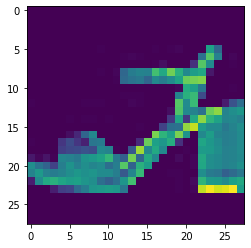

In [39]:
plt.imshow(X_reshaped[1])

In [40]:
n_epochs = 10
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "model_ckps/my_mnist_model")

0 Train accuracy: 0.9 Test accuracy: 0.863
1 Train accuracy: 0.93 Test accuracy: 0.8839
2 Train accuracy: 0.88 Test accuracy: 0.8945
3 Train accuracy: 0.91 Test accuracy: 0.896
4 Train accuracy: 0.93 Test accuracy: 0.9058
5 Train accuracy: 0.97 Test accuracy: 0.9032
6 Train accuracy: 0.96 Test accuracy: 0.9086
7 Train accuracy: 0.96 Test accuracy: 0.9043
8 Train accuracy: 0.95 Test accuracy: 0.9143
9 Train accuracy: 0.97 Test accuracy: 0.9098
